In [35]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [36]:
df = pd.read_csv('US_Accidents_March23.csv', low_memory=False)

In [37]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Data Cleaning

In [39]:
#traffic_signal close by trafic signal or not
cols = ['ID','Severity','Start_Time','State','City','County','Visibility(mi)','Wind_Speed(mph)','Weather_Condition','Sunrise_Sunset','Traffic_Signal']

In [173]:
df_final = df[cols]
df_final.head()

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal
0,A-1,3,2016-02-08 05:46:00,OH,Dayton,Montgomery,10.0,NaN,Light Rain,Night,False
1,A-2,2,2016-02-08 06:07:59,OH,Reynoldsburg,Franklin,10.0,NaN,Light Rain,Night,False
2,A-3,2,2016-02-08 06:49:27,OH,Williamsburg,Clermont,10.0,3.5,Overcast,Night,True
3,A-4,3,2016-02-08 07:23:34,OH,Dayton,Montgomery,9.0,4.6,Mostly Cloudy,Night,False
4,A-5,2,2016-02-08 07:39:07,OH,Dayton,Montgomery,6.0,3.5,Mostly Cloudy,Day,True


In [174]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   State              object 
 4   City               object 
 5   County             object 
 6   Visibility(mi)     float64
 7   Wind_Speed(mph)    float64
 8   Weather_Condition  object 
 9   Sunrise_Sunset     object 
 10  Traffic_Signal     bool   
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 597.0+ MB


In [175]:
df_final['Start_Time'] = pd.to_datetime(df_final['Start_Time'], errors='coerce')
df_final['Year'] = df_final['Start_Time'].dt.year

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3838565729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Start_Time'] = pd.to_datetime(df_final['Start_Time'], errors='coerce')
C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3838565729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Year'] = df_final['Start_Time'].dt.year


In [176]:
df_final = df_final.dropna(subset=['Year'])
df_final['Year']= df_final['Year'].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   State              object        
 4   City               object        
 5   County             object        
 6   Visibility(mi)     float64       
 7   Wind_Speed(mph)    float64       
 8   Weather_Condition  object        
 9   Sunrise_Sunset     object        
 10  Traffic_Signal     bool          
 11  Year               int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 646.2+ MB


In [177]:
df_final[df_final.isna()==True]

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728390,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728391,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728392,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_final = df_final.dropna(subset=['ID'])

In [179]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   State              object        
 4   City               object        
 5   County             object        
 6   Visibility(mi)     float64       
 7   Wind_Speed(mph)    float64       
 8   Weather_Condition  object        
 9   Sunrise_Sunset     object        
 10  Traffic_Signal     bool          
 11  Year               int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 646.2+ MB


In [180]:
df_final = df_final.drop_duplicates(subset='ID')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   State              object        
 4   City               object        
 5   County             object        
 6   Visibility(mi)     float64       
 7   Wind_Speed(mph)    float64       
 8   Weather_Condition  object        
 9   Sunrise_Sunset     object        
 10  Traffic_Signal     bool          
 11  Year               int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 646.2+ MB


In [181]:
df_final[(df_final['Visibility(mi)']<0) | (df_final['Wind_Speed(mph)']<0)]

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year


In [182]:
df_final[(df_final['Severity']<0)]

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year


In [186]:
df_2017_to_2019=df_final[(df_final['Year']>=2017.0) & (df_final['Year']<=2019.0)]
df_2017_to_2019.head()

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
9206,A-9207,3,2017-01-01 00:17:36,CA,El Cerrito,Contra Costa,10.0,5.8,Partly Cloudy,Night,True,2017
9207,A-9208,3,2017-01-01 00:26:08,CA,Berkeley,Alameda,10.0,11.5,Overcast,Night,False,2017
9208,A-9209,2,2017-01-01 00:53:41,CA,Oakley,Contra Costa,10.0,5.8,Partly Cloudy,Night,False,2017
9209,A-9210,3,2017-01-01 01:18:51,CA,Richmond,Contra Costa,9.0,3.5,Mostly Cloudy,Night,False,2017
9210,A-9211,3,2017-01-01 01:20:12,CA,El Cerrito,Contra Costa,9.0,3.5,Mostly Cloudy,Night,True,2017


In [187]:
df_2017_to_2019.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
State                     0
City                     56
County                    0
Visibility(mi)        56822
Wind_Speed(mph)      363529
Weather_Condition     57285
Sunrise_Sunset           76
Traffic_Signal            0
Year                      0
dtype: int64

In [188]:
df_2017_to_2019['Visibility(mi)'] = df_2017_to_2019['Visibility(mi)'].fillna(df_2017_to_2019['Visibility(mi)'].mean())
df_2017_to_2019

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3540470955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_to_2019['Visibility(mi)'] = df_2017_to_2019['Visibility(mi)'].fillna(df_2017_to_2019['Visibility(mi)'].mean())


,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
9206,A-9207,3,2017-01-01 00:17:36,CA,El Cerrito,Contra Costa,10.0,5.8,Partly Cloudy,Night,True,2017
9207,A-9208,3,2017-01-01 00:26:08,CA,Berkeley,Alameda,10.0,11.5,Overcast,Night,False,2017
9208,A-9209,2,2017-01-01 00:53:41,CA,Oakley,Contra Costa,10.0,5.8,Partly Cloudy,Night,False,2017
9209,A-9210,3,2017-01-01 01:18:51,CA,Richmond,Contra Costa,9.0,3.5,Mostly Cloudy,Night,False,2017
9210,A-9211,3,2017-01-01 01:20:12,CA,El Cerrito,Contra Costa,9.0,3.5,Mostly Cloudy,Night,True,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,CA,Riverside,Riverside,10.0,13.0,Fair,Day,False,2019
7728390,A-7777758,2,2019-08-23 19:11:30,CA,San Diego,San Diego,10.0,6.0,Fair,Day,False,2019
7728391,A-7777759,2,2019-08-23 19:00:21,CA,Orange,Orange,10.0,10.0,Partly Cloudy,Day,False,2019
7728392,A-7777760,2,2019-08-23 19:00:21,CA,Culver City,Los Angeles,10.0,8.0,Fair,Day,False,2019


In [189]:
df_2017_to_2019['Wind_Speed(mph)'] = df_2017_to_2019['Wind_Speed(mph)'].fillna(df_2017_to_2019['Wind_Speed(mph)'].mean())
df_2017_to_2019

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\739013151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_to_2019['Wind_Speed(mph)'] = df_2017_to_2019['Wind_Speed(mph)'].fillna(df_2017_to_2019['Wind_Speed(mph)'].mean())


,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
9206,A-9207,3,2017-01-01 00:17:36,CA,El Cerrito,Contra Costa,10.0,5.8,Partly Cloudy,Night,True,2017
9207,A-9208,3,2017-01-01 00:26:08,CA,Berkeley,Alameda,10.0,11.5,Overcast,Night,False,2017
9208,A-9209,2,2017-01-01 00:53:41,CA,Oakley,Contra Costa,10.0,5.8,Partly Cloudy,Night,False,2017
9209,A-9210,3,2017-01-01 01:18:51,CA,Richmond,Contra Costa,9.0,3.5,Mostly Cloudy,Night,False,2017
9210,A-9211,3,2017-01-01 01:20:12,CA,El Cerrito,Contra Costa,9.0,3.5,Mostly Cloudy,Night,True,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,CA,Riverside,Riverside,10.0,13.0,Fair,Day,False,2019
7728390,A-7777758,2,2019-08-23 19:11:30,CA,San Diego,San Diego,10.0,6.0,Fair,Day,False,2019
7728391,A-7777759,2,2019-08-23 19:00:21,CA,Orange,Orange,10.0,10.0,Partly Cloudy,Day,False,2019
7728392,A-7777760,2,2019-08-23 19:00:21,CA,Culver City,Los Angeles,10.0,8.0,Fair,Day,False,2019


In [190]:
df_2017_to_2019['Wind_Speed(mph)'] = df_2017_to_2019['Wind_Speed(mph)'].fillna('mean')

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\305906578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_to_2019['Wind_Speed(mph)'] = df_2017_to_2019['Wind_Speed(mph)'].fillna('mean')


In [191]:
df_2017_to_2019['Weather_Condition'] = df_2017_to_2019['Weather_Condition'].fillna('Unknown')
df_2017_to_2019['Sunrise_Sunset'] = df_2017_to_2019['Sunrise_Sunset'].fillna('Unknown')

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\44974955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_to_2019['Weather_Condition'] = df_2017_to_2019['Weather_Condition'].fillna('Unknown')
C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\44974955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_to_2019['Sunrise_Sunset'] = df_2017_to_2019['Sunrise_Sunset'].fillna('Unknown')


In [192]:
df_2017_to_2019.head(20)

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
9206,A-9207,3,2017-01-01 00:17:36,CA,El Cerrito,Contra Costa,10.0,5.8,Partly Cloudy,Night,True,2017
9207,A-9208,3,2017-01-01 00:26:08,CA,Berkeley,Alameda,10.0,11.5,Overcast,Night,False,2017
9208,A-9209,2,2017-01-01 00:53:41,CA,Oakley,Contra Costa,10.0,5.8,Partly Cloudy,Night,False,2017
9209,A-9210,3,2017-01-01 01:18:51,CA,Richmond,Contra Costa,9.0,3.5,Mostly Cloudy,Night,False,2017
9210,A-9211,3,2017-01-01 01:20:12,CA,El Cerrito,Contra Costa,9.0,3.5,Mostly Cloudy,Night,True,2017
9211,A-9212,2,2017-01-01 02:28:37,CA,Bodega Bay,Sonoma,1.8,3.5,Overcast,Night,False,2017
9212,A-9213,2,2017-01-01 02:22:05,CA,Healdsburg,Sonoma,1.8,3.5,Overcast,Night,False,2017
9213,A-9214,2,2017-01-01 02:54:00,CA,Petaluma,Sonoma,1.2,5.8,Overcast,Night,False,2017
9214,A-9215,3,2017-01-01 03:05:06,CA,Fremont,Alameda,10.0,9.2,Overcast,Night,False,2017
9215,A-9216,3,2017-01-01 03:29:36,CA,San Jose,Santa Clara,10.0,4.6,Overcast,Night,False,2017


In [193]:
df_2020_to_2022=df_final[(df_final['Year']>=2020.0) & (df_final['Year']<=2022.0)]
df_2020_to_2022['Visibility(mi)'] = df_2020_to_2022['Visibility(mi)'].fillna(df_2020_to_2022['Visibility(mi)'].mean())
df_2020_to_2022['Wind_Speed(mph)'] = df_2020_to_2022['Wind_Speed(mph)'].fillna(df_2020_to_2022['Wind_Speed(mph)'].mean())
df_2020_to_2022['Weather_Condition'] = df_2020_to_2022['Weather_Condition'].fillna('Unknown')
df_2020_to_2022['Sunrise_Sunset'] = df_2020_to_2022['Sunrise_Sunset'].fillna('Unknown')

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3885701973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_to_2022['Visibility(mi)'] = df_2020_to_2022['Visibility(mi)'].fillna(df_2020_to_2022['Visibility(mi)'].mean())
C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3885701973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_to_2022['Wind_Speed(mph)'] = df_2020_to_2022['Wind_Speed(mph)'].fillna(df_2020_to_2022['Wind_Speed(mph)'].mean())
C:\Users\Poppy\AppData\Local\Temp\ipykernel_1

In [194]:
df_2020_to_2022.head(20)

,ID,Severity,Start_Time,State,City,County,Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Traffic_Signal,Year
512217,A-512230,1,2022-09-08 05:49:30,IL,Bartlett,DuPage,10.0,0.0,Fair,Night,True,2022
512218,A-512231,1,2022-09-08 02:02:05,CA,Littlerock,Los Angeles,10.0,6.0,Fair,Night,False,2022
512219,A-512232,1,2022-09-08 05:14:12,VA,Richmond,Richmond City,10.0,8.0,Mostly Cloudy,Night,True,2022
512220,A-512233,1,2022-09-08 06:22:57,OH,Alliance,Stark,7.0,6.0,Mostly Cloudy,Night,False,2022
512221,A-512234,2,2022-09-08 06:36:20,OH,Independence,Cuyahoga,7.0,3.0,Partly Cloudy,Night,False,2022
512222,A-512235,1,2022-09-08 05:10:50,PA,York,York,9.0,0.0,Cloudy,Night,False,2022
512223,A-512236,2,2022-09-08 06:52:22,OH,Orient,Pickaway,7.0,0.0,Fair,Night,False,2022
512224,A-512237,2,2022-09-08 06:52:22,OH,Columbus,Franklin,10.0,0.0,Fair,Night,False,2022
512225,A-512238,1,2022-09-08 06:10:34,SC,Lake City,Williamsburg,10.0,0.0,Cloudy,Night,False,2022
512226,A-512239,1,2022-09-08 06:10:07,SC,Lexington,Lexington,10.0,0.0,Fair,Night,False,2022


### Analysis

#### Car Accidents from 2017 to 2019

In [195]:
accidents_state = df_2017_to_2019.groupby('State').size().reset_index(name='Count')
accidents_state

,State,Count
0,AL,36242
1,AR,1723
2,AZ,59564
3,CA,522434
4,CO,38874
5,CT,18620
6,DC,3205
7,DE,4155
8,FL,186800
9,GA,70421


In [196]:
top10_accidents_state = accidents_state.sort_values(by='Count', ascending = False).head(10)
top10_accidents_state

,State,Count
3,CA,522434
41,TX,248417
8,FL,186800
38,SC,143688
25,NC,136369
32,NY,118003
43,VA,73499
20,MI,72154
9,GA,70421
35,OR,69861


C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\2590492961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_accidents_state, x='Count', y='State', palette='magma')


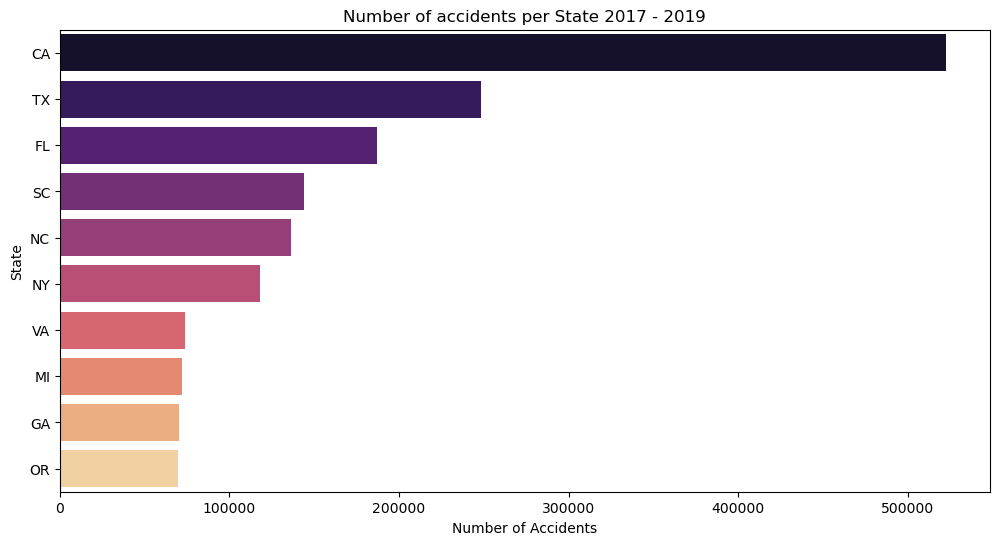

In [197]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_accidents_state, x='Count', y='State', palette='magma')
plt.title('Number of accidents per State 2017 - 2019')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

In [198]:
accidents_severity_weather_condiction = df_2017_to_2019.groupby(['Severity','Weather_Condition']).size().reset_index(name='Count')
accidents_severity_weather_condiction

,Severity,Weather_Condition,Count
0,1,Clear,229
1,1,Cloudy,23
2,1,Drizzle,1
3,1,Fair,71
4,1,Fog,5
...,...,...,...
315,4,Thunderstorms and Rain,39
316,4,Unknown,2471
317,4,Widespread Dust,2
318,4,Wintry Mix,19


In [199]:
top10_severity_weather_condiction = accidents_severity_weather_condiction.sort_values(by='Count', ascending = False).head(30)
top10_severity_weather_condiction

,Severity,Weather_Condition,Count
28,2,Clear,420878
35,2,Fair,251912
91,2,Mostly Cloudy,237284
94,2,Overcast,210725
139,3,Clear,192244
96,2,Partly Cloudy,172101
199,3,Mostly Cloudy,112150
106,2,Scattered Clouds,106396
202,3,Overcast,103019
29,2,Cloudy,83792


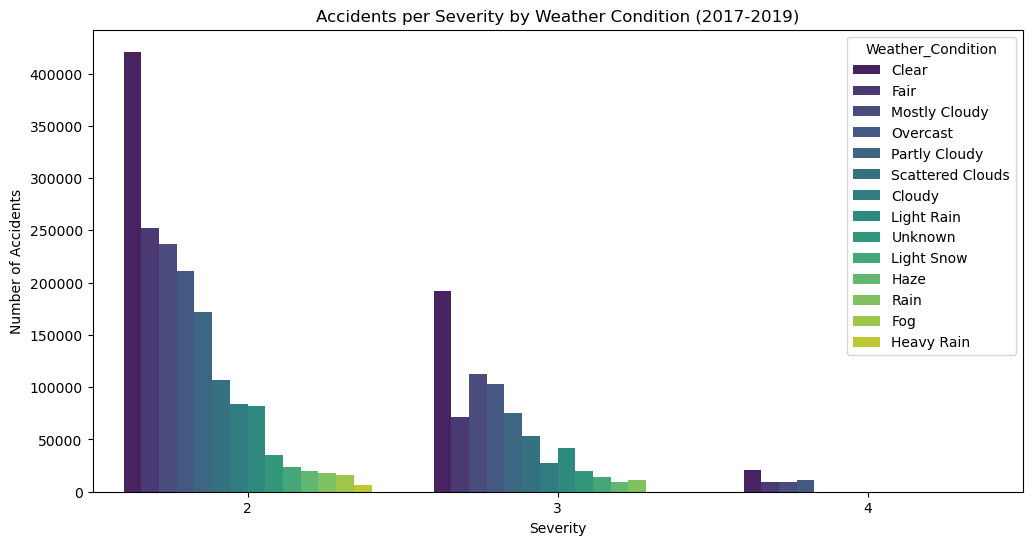

In [200]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_severity_weather_condiction, x='Severity', y='Count', hue='Weather_Condition', palette='viridis')
plt.title('Accidents per Severity by Weather Condition (2017-2019)')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

In [203]:
avg_severity_weather = df_2017_to_2019.groupby('Weather_Condition')['Severity'].mean().reset_index()
avg_severity_weather = avg_severity_weather.sort_values(by='Severity', ascending=False).head(10)
avg_severity_weather

,Weather_Condition,Severity
16,Freezing Rain / Windy,4.000000
40,Light Blowing Snow,3.666667
29,Heavy Sleet,3.000000
43,Light Fog,3.000000
47,Light Freezing Rain / Windy,3.000000
117,Widespread Dust / Windy,3.000000
108,Thunder and Hail / Windy,3.000000
76,Partial Fog / Windy,3.000000
100,Snow and Thunder,3.000000
107,Thunder / Wintry Mix / Windy,3.000000


C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\3446537560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_severity_weather.sort_values('Severity', ascending=False),


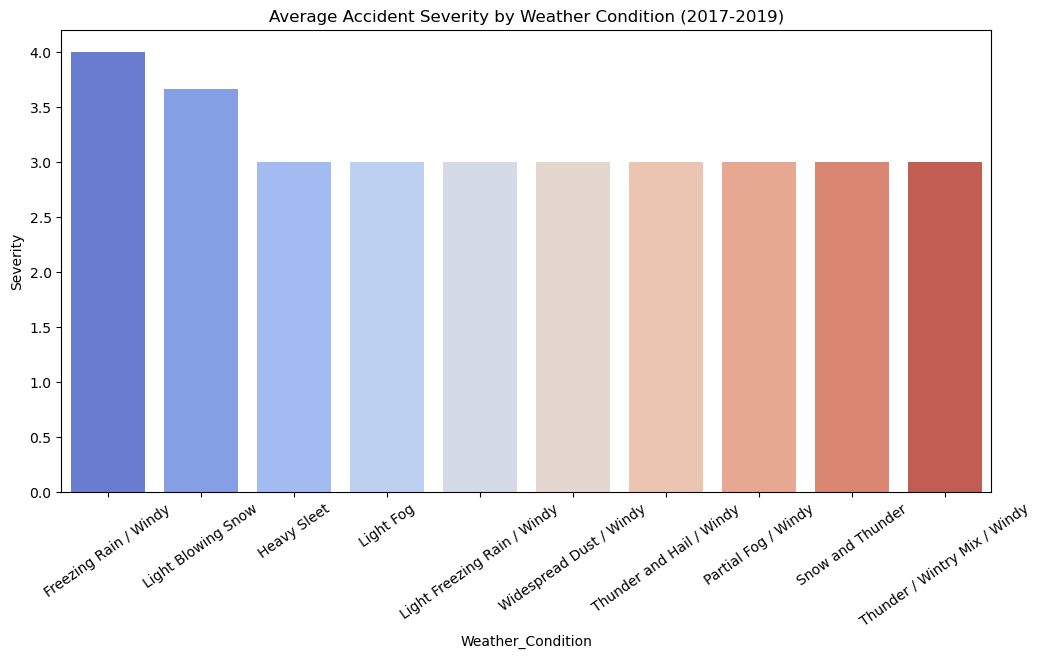

In [204]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_severity_weather.sort_values('Severity', ascending=False),
            x='Weather_Condition', y='Severity', palette='coolwarm')
plt.title('Average Accident Severity by Weather Condition (2017-2019)')
plt.xticks(rotation=35)
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\978778592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sunrise_severity, x='Sunrise_Sunset', y='Severity', palette='pastel')


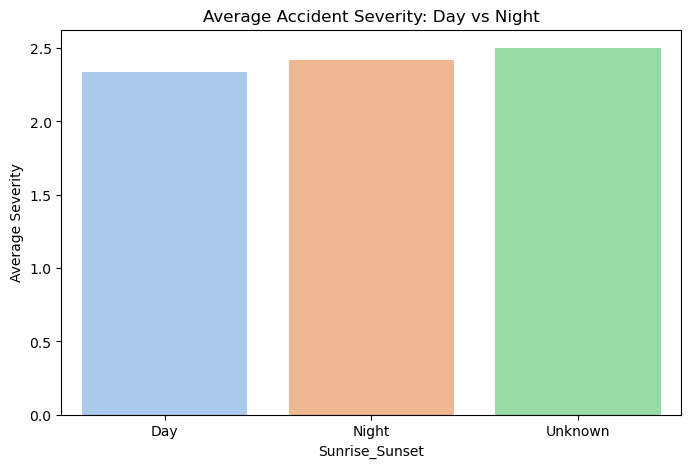

In [205]:
sunrise_severity = df_2017_to_2019.groupby('Sunrise_Sunset')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sunrise_severity, x='Sunrise_Sunset', y='Severity', palette='pastel')
plt.title('Average Accident Severity: Day vs Night')
plt.ylabel('Average Severity')
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\2872872987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_severity, x='Traffic_Signal', y='Severity', palette='Set2')


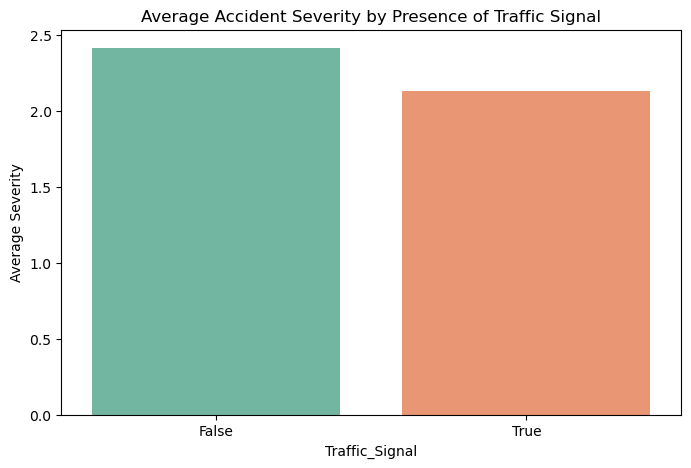

In [206]:
traffic_severity = df_2017_to_2019.groupby('Traffic_Signal')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=traffic_severity, x='Traffic_Signal', y='Severity', palette='Set2')
plt.title('Average Accident Severity by Presence of Traffic Signal')
plt.ylabel('Average Severity')
plt.show()

In [207]:
severity_factors = df_2017_to_2019.groupby(['Severity','Weather_Condition','Sunrise_Sunset','Traffic_Signal']).size().reset_index(name='Count')
severity_factors

,Severity,Weather_Condition,Sunrise_Sunset,Traffic_Signal,Count
0,1,Clear,Day,False,142
1,1,Clear,Day,True,33
2,1,Clear,Night,False,44
3,1,Clear,Night,True,10
4,1,Cloudy,Day,False,11
...,...,...,...,...,...
921,4,Widespread Dust,Night,False,1
922,4,Wintry Mix,Day,False,11
923,4,Wintry Mix,Night,False,7
924,4,Wintry Mix,Night,True,1


In [208]:
pivot = df_2017_to_2019.pivot_table(index='State', columns='Weather_Condition', values='Severity', aggfunc='mean')
pivot

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,...,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Unknown,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
State,,,,,,,,,,,,,,,,,,,,,
AL,NaN,NaN,NaN,NaN,2.379110,2.270427,2.277778,2.200000,NaN,2.000000,...,2.537879,2.777778,NaN,NaN,2.429012,NaN,NaN,NaN,3.000000,NaN
AR,NaN,NaN,NaN,NaN,2.986441,2.560345,NaN,NaN,NaN,NaN,...,4.000000,3.250000,NaN,NaN,2.703704,NaN,NaN,NaN,2.000000,NaN
AZ,NaN,2.000000,NaN,NaN,2.308985,2.229616,2.428571,2.000000,NaN,NaN,...,2.175000,2.307692,NaN,NaN,2.326548,NaN,2.375000,NaN,NaN,NaN
CA,2.102564,2.074074,NaN,NaN,2.387488,2.232179,2.153846,2.525510,NaN,NaN,...,2.571429,2.347826,NaN,NaN,2.299418,2.090909,2.277778,3.0,2.142857,NaN
CO,NaN,3.500000,2.476190,3.0,2.607783,2.694064,2.961538,2.387097,NaN,2.333333,...,2.724138,2.375000,NaN,NaN,3.017327,NaN,NaN,NaN,2.479167,NaN
CT,NaN,NaN,NaN,NaN,2.597619,2.596045,2.727273,NaN,NaN,NaN,...,2.500000,2.600000,NaN,NaN,2.753846,NaN,NaN,NaN,2.565217,NaN
DC,NaN,NaN,NaN,NaN,2.573964,2.387387,NaN,NaN,NaN,NaN,...,3.857143,NaN,NaN,NaN,2.337442,NaN,NaN,NaN,2.000000,NaN
DE,NaN,NaN,NaN,NaN,2.325648,2.163717,2.000000,NaN,NaN,NaN,...,3.000000,2.000000,NaN,NaN,2.312500,NaN,NaN,NaN,2.000000,NaN
FL,NaN,NaN,NaN,NaN,2.340886,2.393931,2.377358,2.571429,NaN,NaN,...,2.450559,2.526807,NaN,NaN,2.490280,NaN,2.000000,NaN,NaN,NaN


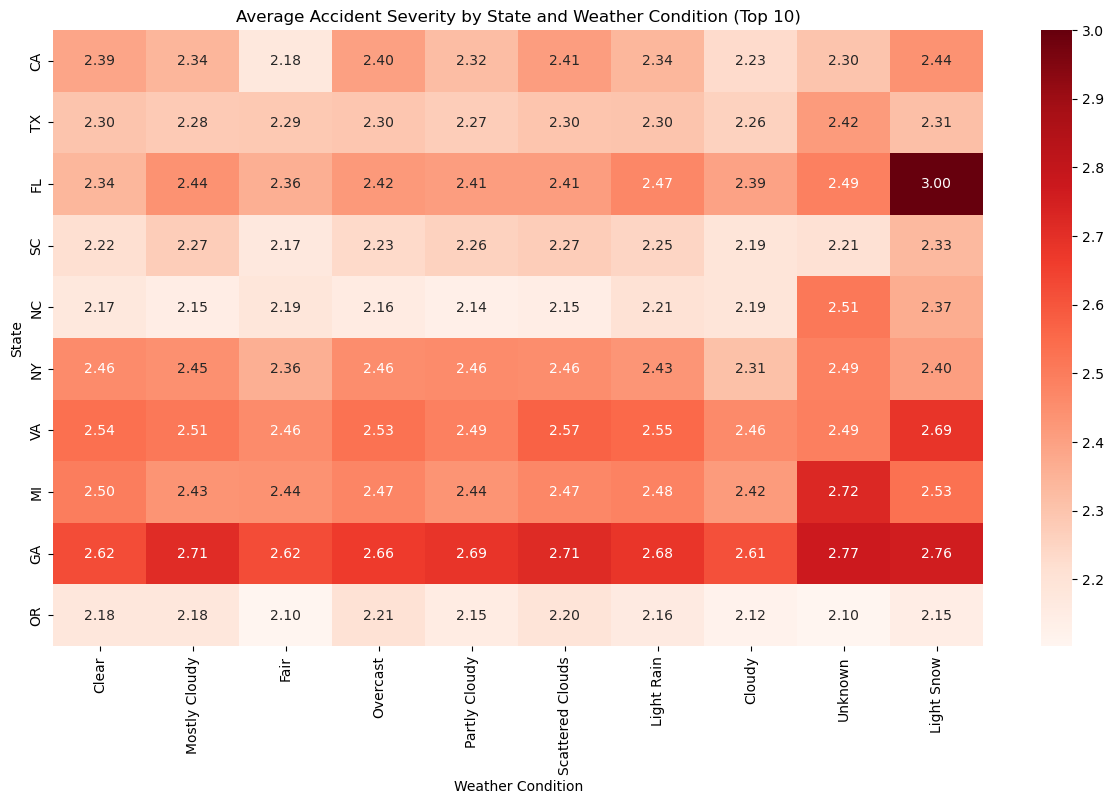

In [210]:
top_states = df_2017_to_2019['State'].value_counts().nlargest(10).index
top_weather = df_2017_to_2019['Weather_Condition'].value_counts().nlargest(10).index
pivot = pivot.loc[top_states, top_weather]

plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f")
plt.title('Average Accident Severity by State and Weather Condition (Top 10)')
plt.ylabel('State')
plt.xlabel('Weather Condition')
plt.show()

#### Car Accidents from 2020 to 2022

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\80538163.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




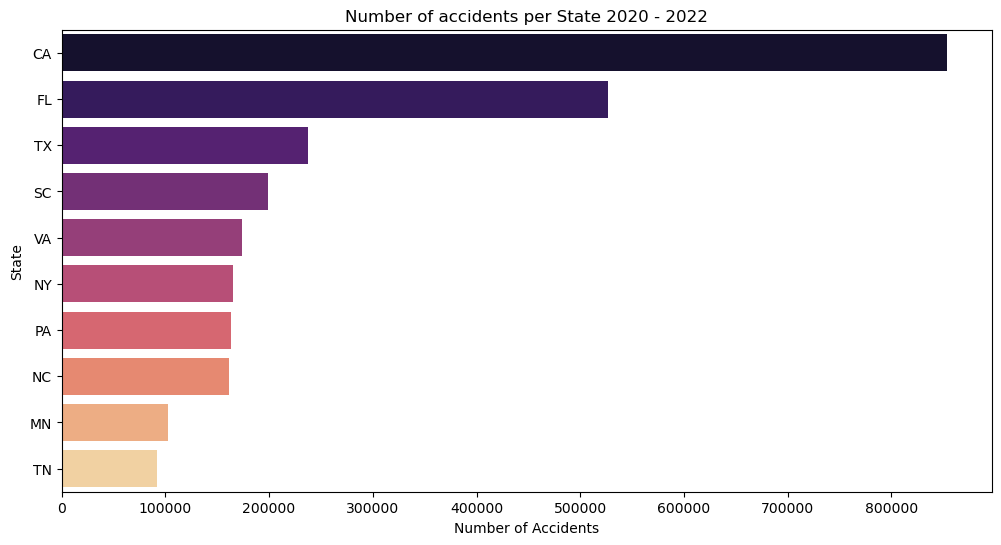

In [215]:
accidents_state = df_2020_to_2022.groupby('State').size().reset_index(name='Count')
top10_accidents_state = accidents_state.sort_values(by='Count', ascending = False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10_accidents_state, x='Count', y='State', palette='magma')
plt.title('Number of accidents per State 2020 - 2022')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

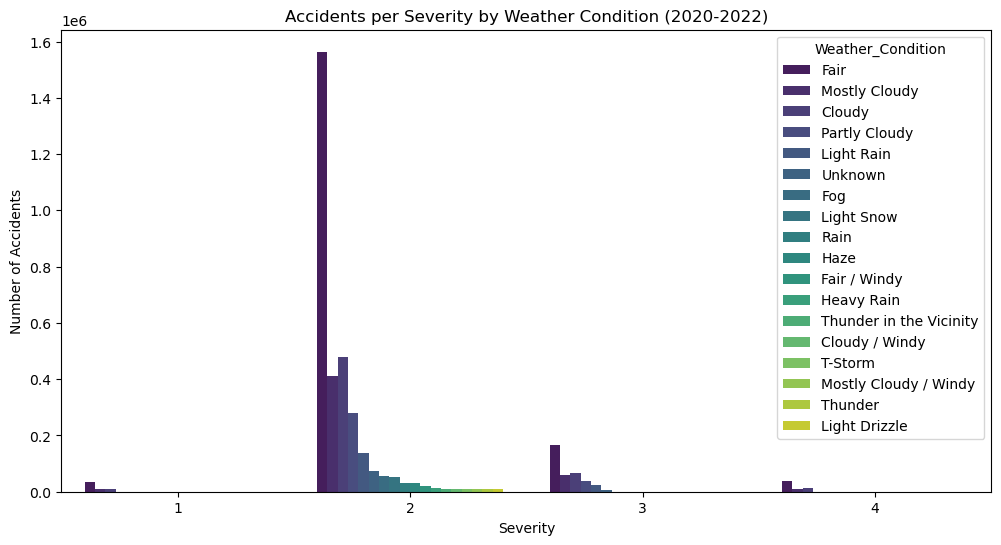

In [216]:
accidents_severity_weather_condiction = df_2020_to_2022.groupby(['Severity','Weather_Condition']).size().reset_index(name='Count')
top10_severity_weather_condiction = accidents_severity_weather_condiction.sort_values(by='Count', ascending = False).head(30)
plt.figure(figsize=(12,6))
sns.barplot(data=top10_severity_weather_condiction, x='Severity', y='Count', hue='Weather_Condition', palette='viridis')
plt.title('Accidents per Severity by Weather Condition (2020-2022)')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\486444292.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




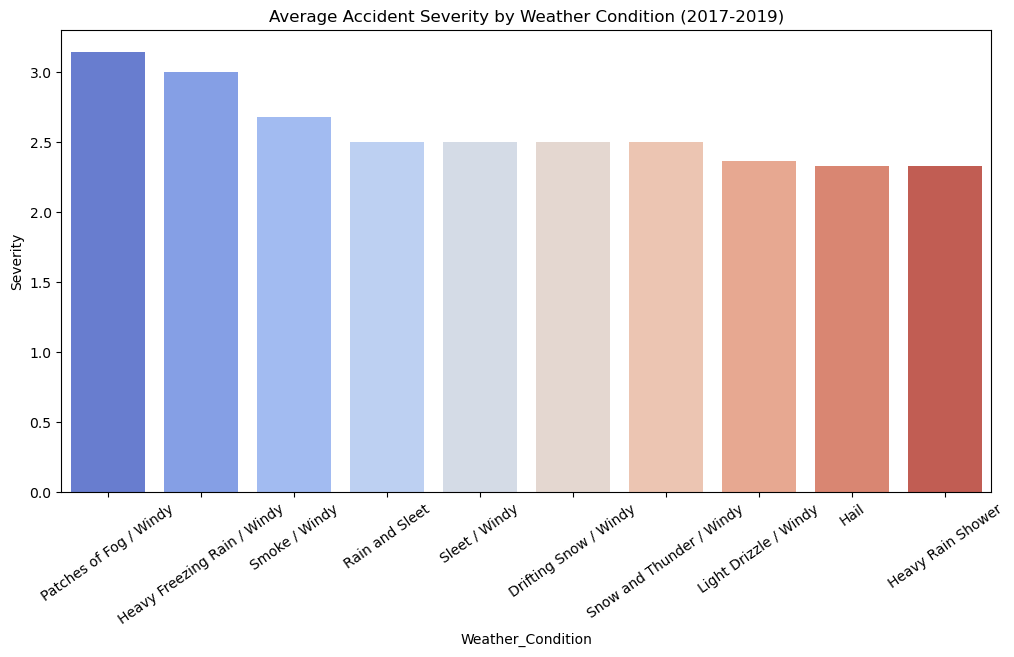

In [219]:
avg_severity_weather = df_2020_to_2022.groupby('Weather_Condition')['Severity'].mean().reset_index()
avg_severity_weather = avg_severity_weather.sort_values(by='Severity', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=avg_severity_weather.sort_values('Severity', ascending=False),
            x='Weather_Condition', y='Severity', palette='coolwarm')
plt.title('Average Accident Severity by Weather Condition (2017-2019)')
plt.xticks(rotation=35)
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\2436811943.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




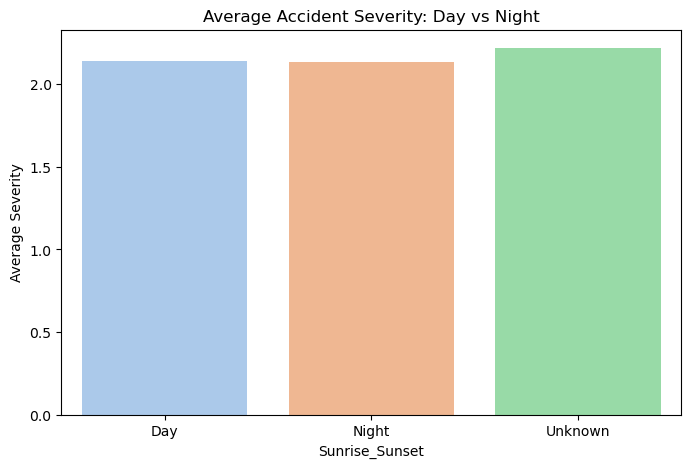

In [220]:
sunrise_severity = df_2020_to_2022.groupby('Sunrise_Sunset')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sunrise_severity, x='Sunrise_Sunset', y='Severity', palette='pastel')
plt.title('Average Accident Severity: Day vs Night')
plt.ylabel('Average Severity')
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\2072126786.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




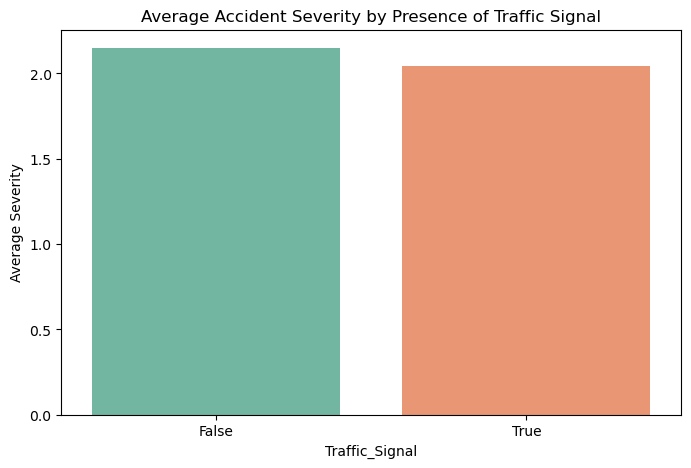

In [221]:
traffic_severity = df_2020_to_2022.groupby('Traffic_Signal')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=traffic_severity, x='Traffic_Signal', y='Severity', palette='Set2')
plt.title('Average Accident Severity by Presence of Traffic Signal')
plt.ylabel('Average Severity')
plt.show()

In [225]:
severity_factors = df_2020_to_2022.groupby(['Severity','Weather_Condition','Sunrise_Sunset','Traffic_Signal']).size().reset_index(name='Count')
pivot = df_2020_to_2022.pivot_table(index='State', columns='Weather_Condition', values='Severity', aggfunc='mean')

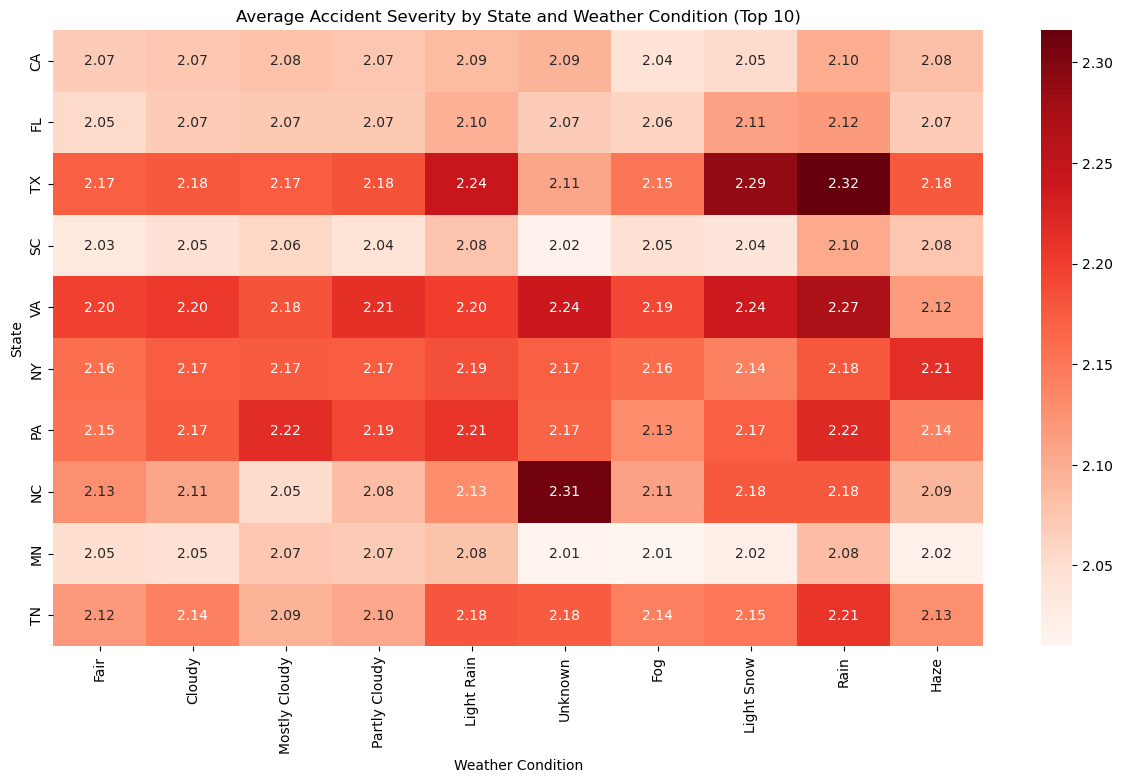

In [226]:
top_states = df_2020_to_2022['State'].value_counts().nlargest(10).index
top_weather = df_2020_to_2022['Weather_Condition'].value_counts().nlargest(10).index
pivot = pivot.loc[top_states, top_weather]

plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f")
plt.title('Average Accident Severity by State and Weather Condition (Top 10)')
plt.ylabel('State')
plt.xlabel('Weather Condition')
plt.show()

### Car Accidents 2017 - 2022

In [237]:
df_final = df_final[(df_final['Year']>=2017) & (df_final['Year']<2023) ]
df_final['Visibility(mi)'] = df_final['Visibility(mi)'].fillna(df_final['Visibility(mi)'].mean())
df_final['Wind_Speed(mph)'] = df_final['Wind_Speed(mph)'].fillna(df_final['Wind_Speed(mph)'].mean())
df_final['Weather_Condition'] = df_final['Weather_Condition'].fillna('Unknown')
df_final['Sunrise_Sunset'] = df_final['Sunrise_Sunset'].fillna('Unknown')

In [248]:
top10_accidents_state

,State,Count
3,CA,1376397
8,FL,713606
41,TX,485623
38,SC,342205
25,NC,297575
32,NY,282904
43,VA,247434
36,PA,232856
21,MN,163246
35,OR,157792


C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\673564477.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




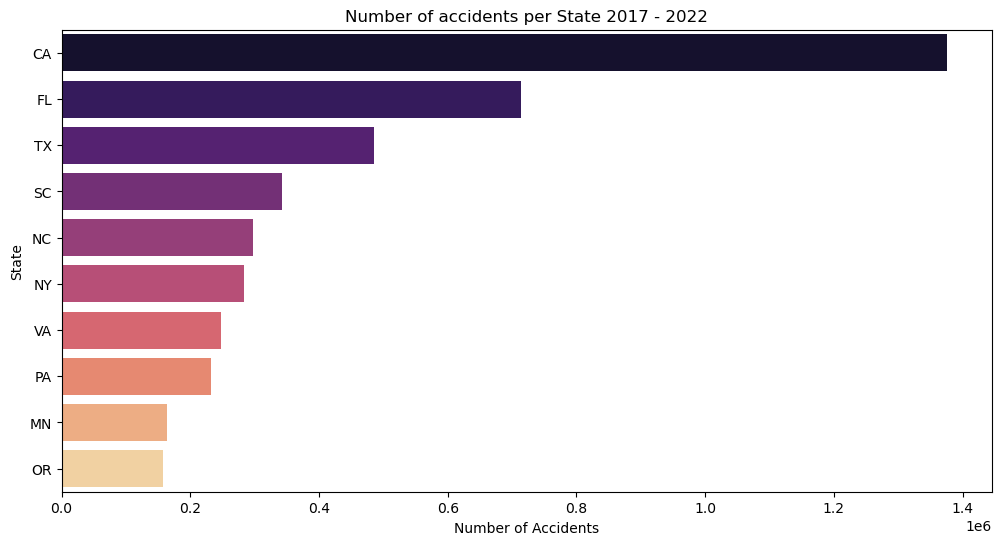

In [238]:
accidents_state = df_final.groupby('State').size().reset_index(name='Count')
top10_accidents_state = accidents_state.sort_values(by='Count', ascending = False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10_accidents_state, x='Count', y='State', palette='magma')
plt.title('Number of accidents per State 2017 - 2022')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

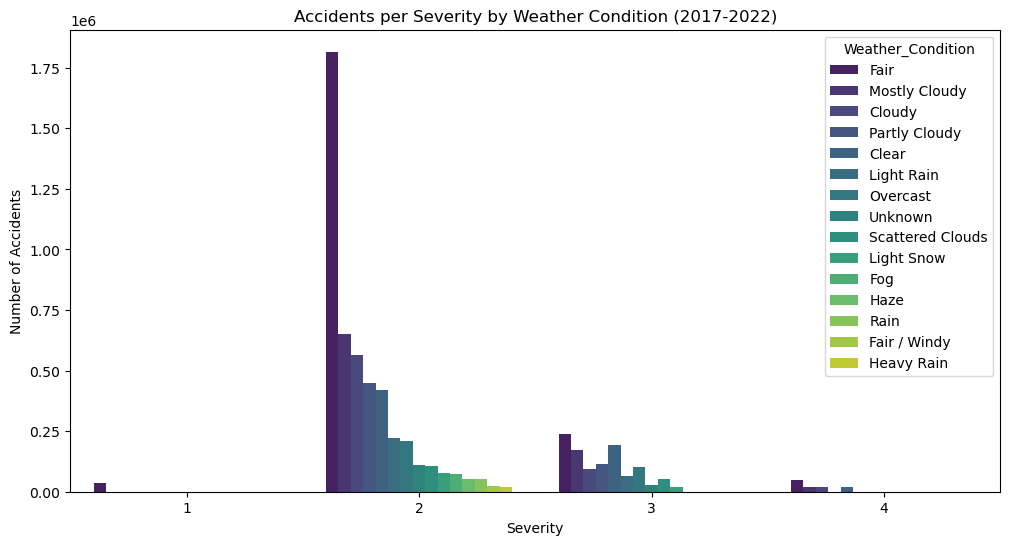

In [247]:
accidents_severity_weather_condiction = df_final.groupby(['Severity','Weather_Condition']).size().reset_index(name='Count')
top10_severity_weather_condiction = accidents_severity_weather_condiction.sort_values(by='Count', ascending = False).head(30)
plt.figure(figsize=(12,6))
sns.barplot(data=top10_severity_weather_condiction, x='Severity', y='Count', hue='Weather_Condition', palette='viridis')
plt.title('Accidents per Severity by Weather Condition (2017-2022)')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\2932732095.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




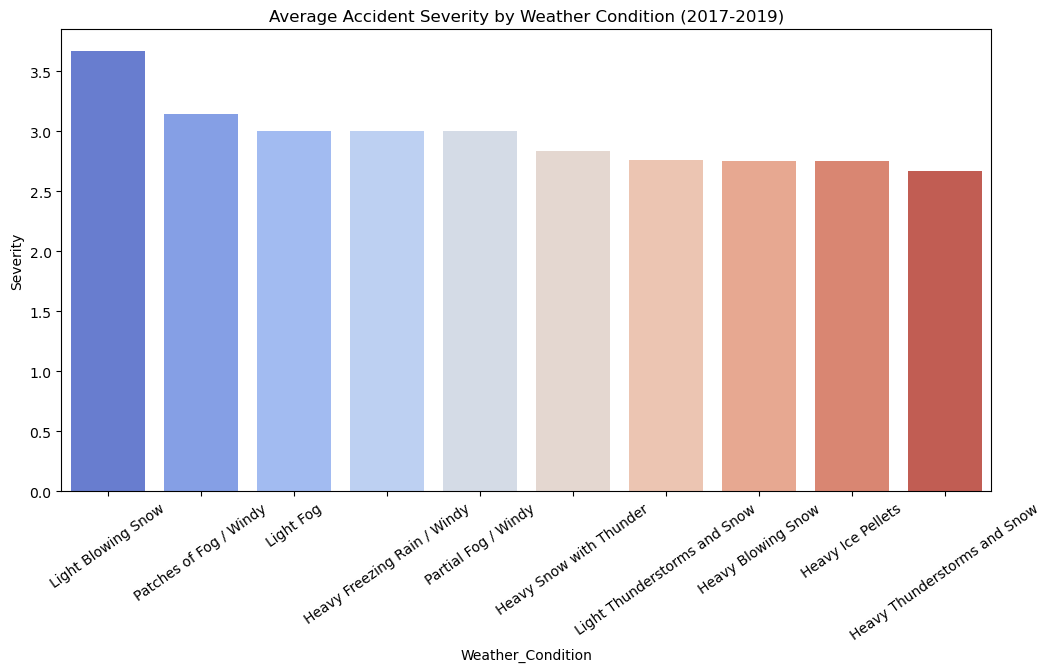

In [240]:
avg_severity_weather = df_final.groupby('Weather_Condition')['Severity'].mean().reset_index()
avg_severity_weather = avg_severity_weather.sort_values(by='Severity', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=avg_severity_weather.sort_values('Severity', ascending=False),
            x='Weather_Condition', y='Severity', palette='coolwarm')
plt.title('Average Accident Severity by Weather Condition (2017-2019)')
plt.xticks(rotation=35)
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\403595944.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




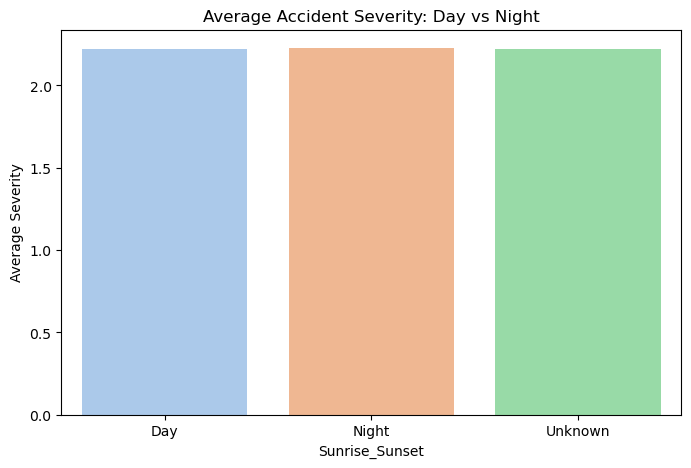

In [244]:
sunrise_severity = df_final.groupby('Sunrise_Sunset')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sunrise_severity, x='Sunrise_Sunset', y='Severity', palette='pastel')
plt.title('Average Accident Severity: Day vs Night')
plt.ylabel('Average Severity')
plt.show()

C:\Users\Poppy\AppData\Local\Temp\ipykernel_14592\97119320.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




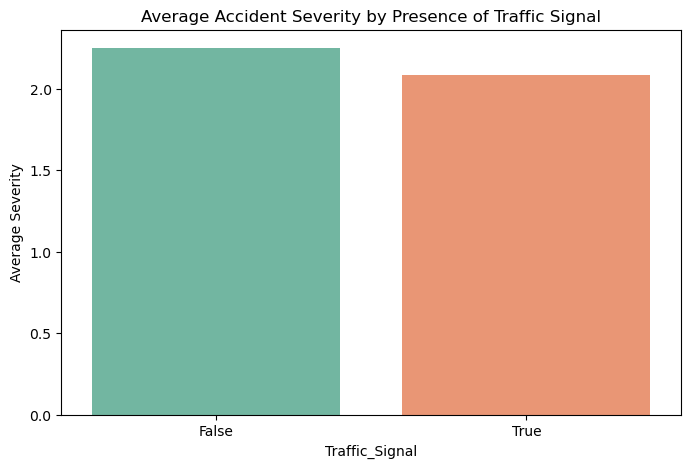

In [245]:
traffic_severity = df_final.groupby('Traffic_Signal')['Severity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=traffic_severity, x='Traffic_Signal', y='Severity', palette='Set2')
plt.title('Average Accident Severity by Presence of Traffic Signal')
plt.ylabel('Average Severity')
plt.show()

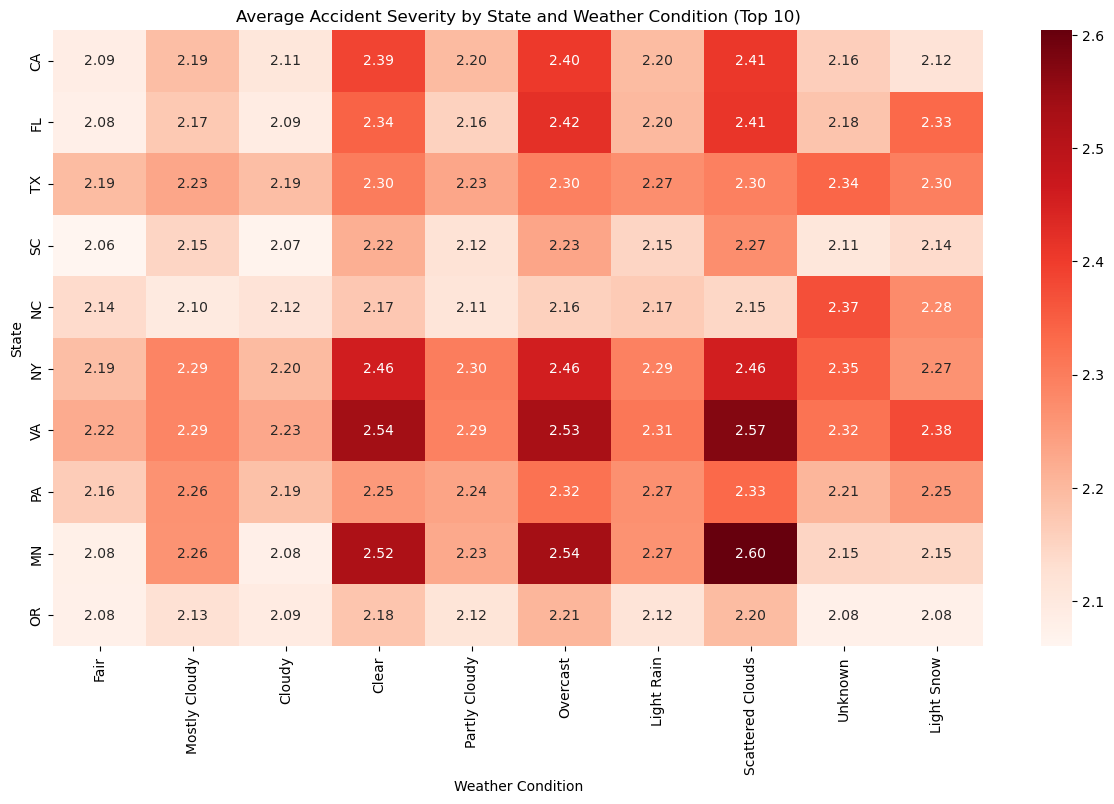

In [246]:
severity_factors = df_final.groupby(['Severity','Weather_Condition','Sunrise_Sunset','Traffic_Signal']).size().reset_index(name='Count')
pivot = df_final.pivot_table(index='State', columns='Weather_Condition', values='Severity', aggfunc='mean')
top_states = df_final['State'].value_counts().nlargest(10).index
top_weather = df_final['Weather_Condition'].value_counts().nlargest(10).index
pivot = pivot.loc[top_states, top_weather]

plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f")
plt.title('Average Accident Severity by State and Weather Condition (Top 10)')
plt.ylabel('State')
plt.xlabel('Weather Condition')
plt.show()